In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dx = 5
dy = 5

Lx = 
Ly = 50

class node:
    def __init__(self):
        
        self.node_pos = None
        self.Cell_size_x = 5
        self.Cell_size_y = 5
        self.grid_face = None
        self.node_type = None 

        self.Gx = None # Location along the x axis
        self.Gy = None # Location along the y axis

        self.edge_color = "blue"

        # self.edge_node_pos = []

In [120]:
mesh = np.array([[node() for x in range(int(Lx/dx))] for y in range(int(Ly/dy))])
mesh.shape

(10, 10)

In [121]:
# Equidistant mesh
x_val = 0
y_val = 0

# the origin of the x and y axis is on the bottom left
for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        cell.Gx = x_val
        cell.Gy = y_val

        x_val += cell.Cell_size_x
    x_val = 0
    y_val += cell.Cell_size_y

In [122]:
def stretch_one_point_gradual(arr, index, percent):
    """
    Stretch or shrink one point by `percent`, and reduce others progressively.
    Total sum remains the same.
    """
    arr = np.array(arr, dtype=float)
    total = arr.sum()
    n = len(arr)

    # Step 1: Compute new value for chosen index
    new_value = arr[index] * (1 + percent / 100.0)

    # Step 2: Remaining total for other values
    leftover = total - new_value

    # Step 3: Progressive weights for others
    weights = np.array([i+1 for i in range(n)], dtype=float)
    weights[index] = 0

    # Step 4: Normalize weights so others sum to leftover
    factor = leftover / weights.sum()
    for i in range(n):
        if i != index:
            arr[i] = factor * weights[i]
    arr[index] = new_value

    # Step 5: Sort if needed
    return np.sort(arr)[::-1]

# Example usage
x_axis = [5, 5, 5, 5, 5, 5]
result = stretch_one_point_gradual(x_axis, index=-1, percent=-90)  # Stretch 3rd element by {percent}%
print(result)
print("Sum:", sum(result))

[9.83333333 7.86666667 5.9        3.93333333 1.96666667 0.5       ]
Sum: 29.999999999999996


In [123]:
test_x = [mesh[0][i].Cell_size_x for i in range(mesh.shape[1])]
test_x

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [124]:
degrade = -50
result = stretch_one_point_gradual(test_x, index=-1, percent=degrade)
result

array([9.5       , 8.44444444, 7.38888889, 6.33333333, 5.27777778,
       4.22222222, 3.16666667, 2.5       , 2.11111111, 1.05555556])

In [125]:
for y in range(mesh.shape[0]):
    # Extract current row cell sizes
    x_array_size = [mesh[y][x].Cell_size_x for x in range(mesh.shape[1])]

    # Stretch chosen index
    stretched_array_size = stretch_one_point_gradual(x_array_size, index=-1, percent=degrade)

    # Assign back the new sizes and recompute bottom-left
    gx_temp = 0
    for x in range(mesh.shape[1]):
        mesh[y][x].Cell_size_x = stretched_array_size[x]
        mesh[y][x].Gx = gx_temp   # ✅ bottom-left of this cell
        gx_temp += stretched_array_size[x]

In [126]:
stretched_array_size[x]

1.0555555555555556

In [127]:
[mesh[0][i].Cell_size_x for i in range(mesh.shape[1])]

[9.5,
 8.444444444444445,
 7.388888888888889,
 6.333333333333334,
 5.277777777777778,
 4.222222222222222,
 3.166666666666667,
 2.5,
 2.111111111111111,
 1.0555555555555556]

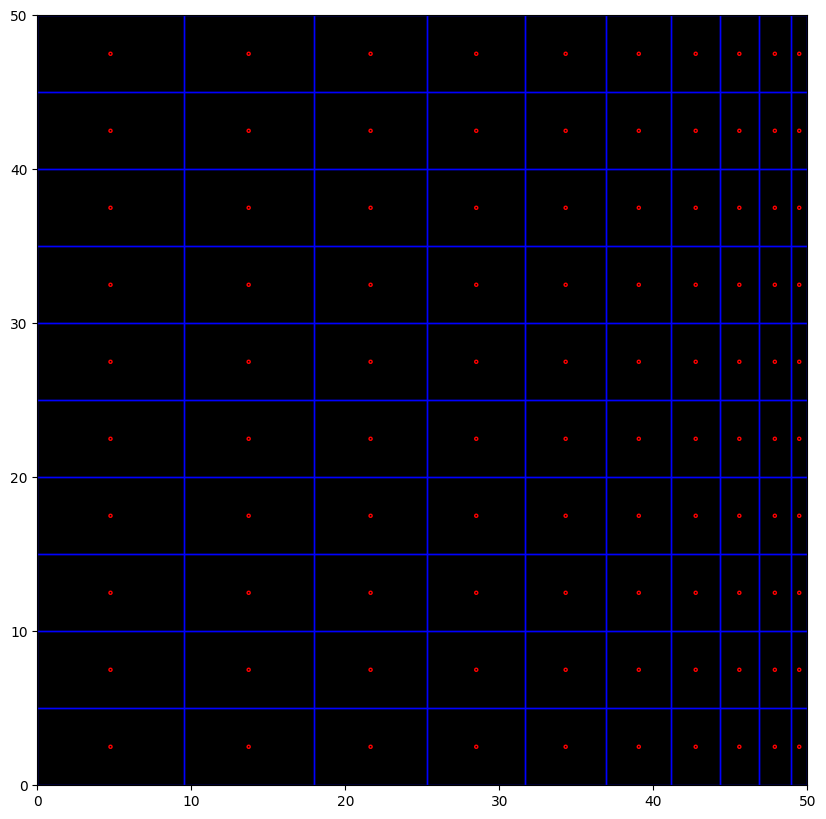

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_size_y = 50
plot_size_x = 50

canvas = np.ones((int(plot_size_y), int(plot_size_x)))
ax.imshow(canvas, origin='lower', cmap='gray',
          extent=[0, plot_size_x, 0, plot_size_y])

for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]

        circle = plt.Circle(
                (cell.Gx + cell.Cell_size_x / 2, cell.Gy + cell.Cell_size_y / 2),
                0.1, color='red', fill=False
            )
        ax.add_patch(circle)

        rect = plt.Rectangle((cell.Gx, cell.Gy), cell.Cell_size_x, dy, linewidth=1, edgecolor=cell.edge_color, facecolor='none')
        ax.add_patch(rect)